In [15]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [16]:
#img=image.load_img("Pari/training/happy/th1.jpg")
#print(os.getcwd())
img=image.load_img("Citi/test/nonclass1/check1.jpg")

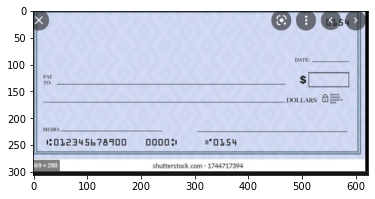

In [17]:
plt.imshow(img)

In [18]:
#cv2.imread("Pari/training/happy/th1.jpg").shape
cv2.imread("Citi/test/nonclass1/check1.jpg").shape

(306, 624, 3)

In [19]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\raman\anaconda3\envs\tf_cpu\python.exe -m pip install --upgrade pip' command.


In [20]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [21]:
train_dataset=train.flow_from_directory('Citi/train',
                                        target_size=(300,600),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('Citi/validation',
                                        target_size=(300,600),
                                       batch_size=3,
                                       class_mode='binary')


Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'class1': 0, 'nonclass1': 1}

In [23]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [24]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,600,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  
                                  
                                 ])

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer =RMSprop(lr=0.001),
              metrics  =['accuracy']
             )

In [27]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 37.3266 - accuracy: 0.7778 - val_loss: 13.6268 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 12.0992 - accuracy: 0.2857 - val_loss: 2.2796 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 4.1911 - accuracy: 0.2857 - val_loss: 3.7918 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 3s 922ms/step - loss: 1.3627 - accuracy: 0.8571 - val_loss: 1.1331 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 3s 934ms/step - loss: 0.5195 - accuracy: 0.7143 - val_loss: 6.5127 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 3s 970ms/step - loss: 4.3339 - accuracy: 0.5714 - val_loss: 0.6636 - val_accuracy: 0.5500
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 0.7387 - accuracy: 0.8571 - val_loss: 6.2324 - val_accuracy: 0.5000
Epoch 8/30
3/3 [=============

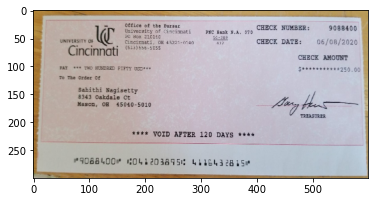

Not a Class1 Check


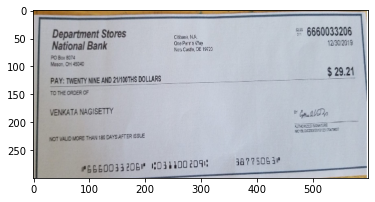

Not a Class1 Check


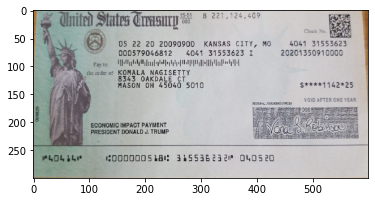

A Class1 Check


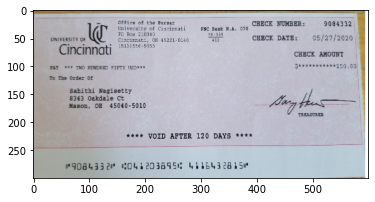

Not a Class1 Check


In [28]:
#dir_path='Pari/testing/happy'
#dir_path='Not-smiling'
#dir_path='smiling'
#dir_path='Citi/test/class1'
dir_path='Citi/realchecks1'

for i in os.listdir(dir_path):
    #print ('test' + i)
    img=image.load_img(dir_path+"//"+i,target_size=(300,600))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    if val==0:
        print("A Class1 Check")
    else:
        print("Not a Class1 Check")